In [1]:
cd ..

c:\Users\Tanner\Documents\repos\ironmarch


In [2]:
import torch
import numpy as np
from models import VAE
import seaborn

In [3]:
model_path = 'saved_models\\vae\sinkhorn\\alpha_1.0_latent_16_softmax_True_version_1.1.2_features_True'
model = torch.load(model_path)
model.to('cpu')
transformation_matrix = model.feature_head[0].weight.data

In [4]:
vector_lengths = torch.pow(torch.sum(torch.pow(transformation_matrix, 2), dim = 1), 1/2)
normalized_plane_vectors = torch.div(transformation_matrix.T, vector_lengths).T

In [9]:
feature_names = [
    'nationality_hate',
    'ethnicity_hate',
    'religion_hate',
    'gender_hate',
    'sexual_orientation_hate',
    'disability_hate',
    'class_hate'
]

In [7]:
for name, plane_vector in zip(feature_names, normalized_plane_vectors.numpy()):
    print(name + ' : \n' + str(np.around(plane_vector, decimals = 2)))

nationality_hate : 
[ 0.23 -0.39  0.19 -0.33  0.3  -0.27  0.26 -0.14 -0.16 -0.36 -0.29 -0.16
 -0.22 -0.13  0.04  0.27]
ethnicity_hate : 
[ 0.34 -0.32  0.18 -0.34  0.28 -0.38  0.33 -0.09 -0.16 -0.26 -0.22 -0.17
 -0.2  -0.14  0.12  0.24]
religion_hate : 
[ 0.21 -0.37  0.19 -0.33  0.3  -0.31  0.19 -0.18 -0.14 -0.37 -0.3  -0.18
 -0.27 -0.14  0.05  0.23]
gender_hate : 
[ 0.26 -0.38  0.26 -0.29  0.27 -0.32  0.22 -0.17 -0.16 -0.35 -0.27 -0.2
 -0.23 -0.17  0.12  0.18]
sexual_orientation_hate : 
[ 0.27 -0.4   0.22 -0.29  0.3  -0.27  0.23 -0.15 -0.16 -0.36 -0.27 -0.18
 -0.24 -0.17  0.12  0.17]
disability_hate : 
[ 0.25 -0.37  0.24 -0.3   0.28 -0.38  0.21 -0.16 -0.13 -0.34 -0.27 -0.17
 -0.22 -0.14  0.12  0.19]
class_hate : 
[ 0.23 -0.28 -0.11 -0.34 -0.2  -0.25  0.39  0.04 -0.36  0.06 -0.23 -0.29
 -0.25 -0.2   0.23  0.25]


<AxesSubplot:>

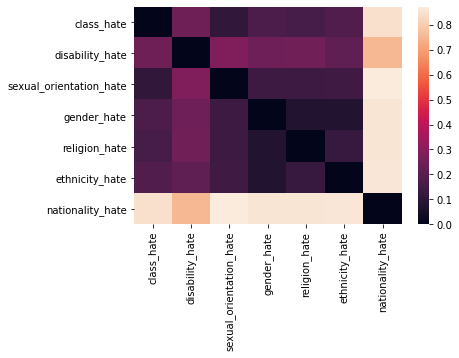

In [10]:
def get_cos_sim(vec_one, vec_two):
    result = torch.acos(torch.dot(vec_one, vec_two))
    if torch.equal(result, torch.tensor(1.0)):
        return torch.tensor(0.0)
    if result.isnan():
        return torch.tensor(0.0)
    return result

similarity_heat_map = torch.zeros((normalized_plane_vectors.shape[0], normalized_plane_vectors.shape[0]))

for i in range(normalized_plane_vectors.shape[0]):
    for j in range(normalized_plane_vectors.shape[0]):
        similarity_heat_map[i, j] = get_cos_sim(normalized_plane_vectors[i], normalized_plane_vectors[j])

seaborn.heatmap(similarity_heat_map, xticklabels=feature_names, yticklabels=feature_names)